# Premier League Season Prediction

## Introduction
The **English Premier League (EPL)** is one of the most competitive football leagues in the world, with each season bringing unexpected twists, underdog stories, and title battles that keep fans guessing until the very end.  

This project aims to **predict the final league standings for the upcoming Premier League season** by simulating every match using a **machine learning model** trained on historical match data, team market values, and past performance trends.  

Rather than relying solely on personal opinions or bookmaker odds, this approach uses **data-driven analysis** to estimate each team’s probability of winning, drawing, or losing a match. By simulating the full season multiple times, the project produces an **average predicted table** that smooths out randomness and highlights likely outcomes.

### Why This Project?
- **For fans** – to get a statistically grounded prediction before the season starts.  
- **For analysts** – to explore how data features like market value, previous season performance, and home advantage influence results.  
- **For learning** – to demonstrate a practical sports analytics pipeline using Python, machine learning, and data visualization tools like **Power BI** .


## Data Loading

To start the project, I load and combine **historical Premier League CSV files** into a single Pandas DataFrame for analysis.


In [1]:
import os 
import pandas as pd


pd.set_option("display.max_columns", None)  
pd.set_option("display.width", None) 


In [2]:
def load_season_dfs(folder_path):
    season_dfs = []

    for filename in sorted(os.listdir(folder_path)):  
        if filename.startswith("EPL_") and filename.endswith(".csv"):
            season_name = filename.replace(".csv", "").replace("EPL_", "")  
            file_path = os.path.join(folder_path, filename)
            try:
                df = pd.read_csv(file_path)

                df["Season"] = season_name   
                df = df.reset_index(drop=True)
                df["Matchweek"] = (df.index // 10) + 1


                season_dfs.append(df)
                print(f"Loaded {season_name}")
            except Exception as e:
                print(f"Failed to load {filename}: {e}")

    return pd.concat(season_dfs, ignore_index=True)


In [3]:
all_df = load_season_dfs("Past_data")

Loaded 05_06
Loaded 06_07
Loaded 07_08
Loaded 08_09
Loaded 09_10
Loaded 10_11
Loaded 11_12
Loaded 12_13
Loaded 13_14
Loaded 14_15
Loaded 15_16
Loaded 16_17
Loaded 17_18
Loaded 18_19
Loaded 19_20
Loaded 20_21
Loaded 21_22
Loaded 22_23
Loaded 23_24
Loaded 24_25


In [4]:
all_df


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,Season,Matchweek,BSH,BSD,BSA,PSH,PSD,PSA,PSCH,PSCD,PSCA,Time,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFH,BFD,BFA,1XBH,1XBD,1XBA,BFEH,BFED,BFEA,BFE>2.5,BFE<2.5,BFEAHH,BFEAHA,BFCH,BFCD,BFCA,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,13/08/05,Aston Villa,Bolton,2,2,D,2,2,D,M Riley,3,13,2,6,14,16,7,8,0,2,0,0,2.30,3.25,3.00,2.10,3.25,3.15,2.25,3.20,3.10,2.1,3.0,3.1,2.10,3.00,3.20,2.20,3.2,3.20,2.20,3.2,2.80,2.00,3.25,3.40,2.20,3.25,3.10,56.0,2.40,2.20,3.30,3.16,3.40,3.05,36.0,2.20,2.01,1.87,1.70,22.0,-0.25,2.10,2.01,1.92,1.84,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,13/08/05,Everton,Man United,0,2,A,0,1,A,G Poll,10,12,5,5,15,14,8,6,3,1,0,0,5.00,3.40,1.72,4.35,3.35,1.75,4.25,3.40,1.83,3.8,3.1,1.8,3.75,3.20,1.83,4.33,3.6,1.75,4.33,3.2,1.72,4.00,3.25,1.83,4.50,3.30,1.80,56.0,5.65,4.69,3.70,3.36,1.80,1.69,36.0,2.10,1.93,1.87,1.79,23.0,0.75,2.05,2.00,1.93,1.86,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,13/08/05,Fulham,Birmingham,0,0,D,0,0,D,R Styles,15,7,7,4,12,13,6,6,1,2,0,0,2.37,3.25,2.87,2.30,3.20,2.80,2.30,3.30,2.95,2.2,3.0,2.9,2.25,3.00,2.88,2.30,3.2,3.00,2.30,3.2,2.62,2.20,3.20,3.00,2.35,3.25,2.80,56.0,2.60,2.31,3.30,3.16,3.05,2.87,36.0,2.24,2.04,1.77,1.69,21.0,0.00,1.85,1.81,2.11,2.05,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,13/08/05,Man City,West Brom,0,0,D,0,0,D,C Foy,15,13,8,3,13,11,3,6,2,3,0,0,1.72,3.40,5.00,1.65,3.45,4.80,1.73,3.45,4.75,1.7,3.2,4.2,1.67,3.25,4.50,1.70,3.4,5.00,1.70,3.3,4.33,1.67,3.25,5.00,1.75,3.25,5.00,55.0,1.80,1.69,3.63,3.38,5.60,4.79,36.0,2.10,1.94,1.90,1.77,23.0,-0.75,2.19,2.10,1.83,1.76,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/08/05,Middlesbrough,Liverpool,0,0,D,0,0,D,M Halsey,4,16,2,7,17,11,5,0,2,3,1,0,2.87,3.20,2.40,2.90,3.35,2.20,2.70,3.30,2.45,2.5,3.0,2.5,2.75,3.10,2.30,2.70,3.2,2.50,2.75,3.1,2.30,2.75,3.20,2.38,2.80,3.25,2.35,56.0,3.30,2.81,3.35,3.17,2.50,2.35,

## Dataset Overview

After loading all historical EPL CSV files into a single DataFrame (`all_df`), we now have a comprehensive dataset containing match results, team stats, and betting odds from the **2005–2006** season up to the **2024–2025** season.

### Key Columns
- **Basic Match Info**
  - `Div` = Division code (`E0` for Premier League)
  - `Date` = Match date
  - `Season` = Season identifier (e.g., `05_06`)
  - `Matchweek` = Matchweek number (calculated automatically)
  - `HomeTeam` / `AwayTeam` = Team names

- **Match Results**
  - `FTHG` / `FTAG` = Full-time home/away goals
  - `FTR` = Full-time result (`H` = Home win, `D` = Draw, `A` = Away win)
  - `HTHG` / `HTAG` / `HTR` = Half-time stats

- **Match Statistics**
  - `HS` / `AS` = Shots by home/away team
  - `HST` / `AST` = Shots on target
  - `HF` / `AF` = Fouls committed
  - `HC` / `AC` = Corners
  - `HY` / `AY` = Yellow cards
  - `HR` / `AR` = Red cards

- **Betting Odds**
  - Multiple bookmaker odds (`B365H`, `B365D`, `B365A`, etc.)
  - Asian Handicap odds (`BbAH`, `BbAHh`, etc.)
  - Over/Under goals odds

- **Other Columns**
  - `Referee` = Match referee
  - Various maximum and average betting odds from different markets

### Dataset Size
- **Rows:** ~7,600 matches
- **Columns:** 150+ features per match

### Example Rows
| Date       | HomeTeam     | AwayTeam     | FTHG | FTAG | FTR | Season | Matchweek |
|------------|--------------|--------------|------|------|-----|--------|-----------|
| 13/08/05   | Aston Villa  | Bolton       | 2    | 2    | D   | 05_06  | 1         |
| 13/08/05   | Everton      | Man United   | 0    | 2    | A   | 05_06  | 1         |
| 25/05/2025 | Newcastle    | Everton      | 0    | 1    | A   | 24_25  | 38        |

---

**Note:**  
Many columns related to betting odds are **NaN** for older seasons or certain bookmakers. We will handle these during the **data cleaning & feature engineering** stage.


In [5]:
all_df_2 = all_df.drop(columns = ["Div", "Date", "Time"])

all_df_2.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,Season,Matchweek,BSH,BSD,BSA,PSH,PSD,PSA,PSCH,PSCD,PSCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFH,BFD,BFA,1XBH,1XBD,1XBA,BFEH,BFED,BFEA,BFE>2.5,BFE<2.5,BFEAHH,BFEAHA,BFCH,BFCD,BFCA,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,Aston Villa,Bolton,2,2,D,2,2,D,M Riley,3,13,2,6,14,16,7,8,0,2,0,0,2.30,3.25,3.00,2.10,3.25,3.15,2.25,3.20,3.10,2.1,3.0,3.1,2.10,3.00,3.20,2.20,3.2,3.20,2.20,3.2,2.80,2.00,3.25,3.40,2.20,3.25,3.10,56.0,2.40,2.20,3.30,3.16,3.40,3.05,36.0,2.20,2.01,1.87,1.70,22.0,-0.25,2.10,2.01,1.92,1.84,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Everton,Man United,0,2,A,0,1,A,G Poll,10,12,5,5,15,14,8,6,3,1,0,0,5.00,3.40,1.72,4.35,3.35,1.75,4.25,3.40,1.83,3.8,3.1,1.8,3.75,3.20,1.83,4.33,3.6,1.75,4.33,3.2,1.72,4.00,3.25,1.83,4.50,3.30,1.80,56.0,5.65,4.69,3.70,3.36,1.80,1.69,36.0,2.10,1.93,1.87,1.79,23.0,0.75,2.05,2.00,1.93,1.86,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fulham,Birmingham,0,0,D,0,0,D,R Styles,15,7,7,4,12,13,6,6,1,2,0,0,2.37,3.25,2.87,2.30,3.20,2.80,2.30,3.30,2.95,2.2,3.0,2.9,2.25,3.00,2.88,2.30,3.2,3.00,2.30,3.2,2.62,2.20,3.20,3.00,2.35,3.25,2.80,56.0,2.60,2.31,3.30,3.16,3.05,2.87,36.0,2.24,2.04,1.77,1.69,21.0,0.00,1.85,1.81,2.11,2.05,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Man City,West Brom,0,0,D,0,0,D,C Foy,15,13,8,3,13,11,3,6,2,3,0,0,1.72,3.40,5.00,1.65,3.45,4.80,1.73,3.45,4.75,1.7,3.2,4.2,1.67,3.25,4.50,1.70,3.4,5.00,1.70,3.3,4.33,1.67,3.25,5.00,1.75,3.25,5.00,55.0,1.80,1.69,3.63,3.38,5.60,4.79,36.0,2.10,1.94,1.90,1.77,23.0,-0.75,2.19,2.10,1.83,1.76,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Middlesbrough,Liverpool,0,0,D,0,0,D,M Halsey,4,16,2,7,17,11,5,0,2,3,1,0,2.87,3.20,2.40,2.90,3.35,2.20,2.70,3.30,2.45,2.5,3.0,2.5,2.75,3.10,2.30,2.70,3.2,2.50,2.75,3.1,2.30,2.75,3.20,2.38,2.80,3.25,2.35,56.0,3.30,2.81,3.35,3.17,2.50,2.35,36.0,2.23,2.02,1.80,1.71,21.0,0.25,1.89,1.86,2.04,2.00,05_06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
columns_to_keep = [
    "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR",
    "HTHG", "HTAG", "HTR",
    "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", 
    "HY", "AY", "HR", "AR", "Season", "Matchweek"
]

all_df_3 = all_df_2.drop(columns=[col for col in all_df_2.columns if col not in columns_to_keep])

all_df_3.head()


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season,Matchweek
0,Aston Villa,Bolton,2,2,D,2,2,D,3,13,2,6,14,16,7,8,0,2,0,0,05_06,1
1,Everton,Man United,0,2,A,0,1,A,10,12,5,5,15,14,8,6,3,1,0,0,05_06,1
2,Fulham,Birmingham,0,0,D,0,0,D,15,7,7,4,12,13,6,6,1,2,0,0,05_06,1
3,Man City,West Brom,0,0,D,0,0,D,15,13,8,3,13,11,3,6,2,3,0,0,05_06,1
4,Middlesbrough,Liverpool,0,0,D,0,0,D,4,16,2,7,17,11,5,0,2,3,1,0,05_06,1


In [7]:
all_df_3.isnull().sum()

HomeTeam     0
AwayTeam     0
FTHG         0
FTAG         0
FTR          0
HTHG         0
HTAG         0
HTR          0
HS           0
AS           0
HST          0
AST          0
HF           0
AF           0
HC           0
AC           0
HY           0
AY           0
HR           0
AR           0
Season       0
Matchweek    0
dtype: int64

## Data Cleaning – Step 1: Column Selection

The original dataset (`all_df`) contains **150+ columns**, including many detailed bookmaker odds and meta-information that are not essential for our initial match outcome prediction.

To simplify the dataset and focus on **core match performance features**, I:
1. Removed unnecessary columns (`Div`, `Date`, `Time`).
2. Kept only **match-related statistics** and essential metadata.

In [8]:
EPL_25_26 = pd.read_csv("25_26_Season/Premier_League_25-26.csv")

EPL_25_26.head()

,Date,Home,Away,Matchweek
0,8/15/2025,Liverpool,Bournemouth,1
1,8/16/2025,Aston Villa,Newcastle,1
2,NaN,Brighton,Fulham,1
3,NaN,Sunderland,West Ham,1
4,NaN,Spurs,Burnley,1


In [9]:
EPL_25_26["Home"] = EPL_25_26["Home"].replace({
    "Spurs": "Tottenham",
    "Man Utd": "Man United"
})

EPL_25_26["Away"] = EPL_25_26["Away"].replace({
    "Spurs": "Tottenham",
    "Man Utd": "Man United"
})


In [10]:
EPL_25_26['Season'] = "25_26"

EPL_25_26 = EPL_25_26.drop(columns = "Date")

EPL_25_26.head()

,Home,Away,Matchweek,Season
0,Liverpool,Bournemouth,1,25_26
1,Aston Villa,Newcastle,1,25_26
2,Brighton,Fulham,1,25_26
3,Sunderland,West Ham,1,25_26
4,Tottenham,Burnley,1,25_26


In [11]:
all_df_Team_name = all_df_3['HomeTeam'].unique()

In [12]:
next_season_team = EPL_25_26['Home'].unique()

In [13]:
not_next_season = [col for col in all_df_Team_name if col not in next_season_team]

not_next_season

['Middlesbrough',
 'Portsmouth',
 'Wigan',
 'Birmingham',
 'Blackburn',
 'Charlton',
 'West Brom',
 'Bolton',
 'Reading',
 'Sheffield United',
 'Watford',
 'Derby',
 'Hull',
 'Stoke',
 'Blackpool',
 'QPR',
 'Swansea',
 'Norwich',
 'Southampton',
 'Cardiff',
 'Leicester',
 'Huddersfield',
 'Luton',
 'Ipswich']

In [14]:
EPL_transfer = pd.read_csv("EPL_transfer.csv")

EPL_transfer.head()

,Club,Squad,Age,Foreiners,Market Value,Total Market Value,Season
0,Chelsea,30,25.3,21,12.11m,363.43m,05_06
1,Man United,34,25.4,21,7.49m,254.58m,05_06
2,Arsenal,37,24.1,30,6.28m,232.33m,05_06
3,Liverpool,37,24.9,27,5.85m,216.35m,05_06
4,Tottenham,32,26.3,16,4.82m,154.33m,05_06


In [15]:
def convert_to_million(value):
    if isinstance(value, str):
        value = value.strip().lower().replace(",", "").strip()
        if "m" in value:
            return float(value.replace("m", ""))
        elif "bn" in value:
            return float(value.replace("bn", "")) * 1000
        else:
            try:
                return float(value)
            except:
                return None
    elif isinstance(value, (int, float)):
        return float(value)
    return None

In [16]:
EPL_transfer["Market Value"] = EPL_transfer['Market Value'].apply(convert_to_million)
EPL_transfer['Total Market Value'] = EPL_transfer['Total Market Value'].apply(convert_to_million)

EPL_transfer

,Club,Squad,Age,Foreiners,Market Value,Total Market Value,Season
0,Chelsea,30,25.3,21,12.11,363.43,05_06
1,Man United,34,25.4,21,7.49,254.58,05_06
2,Arsenal,37,24.1,30,6.28,232.33,05_06
3,Liverpool,37,24.9,27,5.85,216.35,05_06
4,Tottenham,32,26.3,16,4.82,154.33,05_06
...,...,...,...,...,...,...,...
415,Wolves,27,26.0,25,11.81,318.80,25_26
416,Everton,22,26.1,12,14.19,312.20,25_26
417,Leeds,29,26.6,20,9.61,278.60,25_26
418,Sunderland,38,24.3,27,6.50,246.98,25_26


In [17]:
transfer_team = EPL_transfer['Club'].unique()

typo_check = [col for col in all_df_Team_name if col not in transfer_team]

typo_check

[]

In [18]:
keeping_columns = ["HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "Season", "Matchweek"]

all_df_4 = all_df_3.drop(columns = [col for col in all_df_3.columns
                                     if col not in keeping_columns])


all_df_4.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek
0,Aston Villa,Bolton,2,2,D,05_06,1
1,Everton,Man United,0,2,A,05_06,1
2,Fulham,Birmingham,0,0,D,05_06,1
3,Man City,West Brom,0,0,D,05_06,1
4,Middlesbrough,Liverpool,0,0,D,05_06,1


In [19]:
EPL_transfer_renamed = EPL_transfer.rename(columns = {
    "Club": "Team",
    "Market Value": "Market_Value",
    "Total Market Value": "Total_Market_Value"
})

all_df_5 = all_df_4.merge(
    EPL_transfer_renamed[['Team', 'Season', 'Market_Value', 'Total_Market_Value']].rename(columns = {
        'Team': 'HomeTeam',
        'Market_Value': 'Home_Market_Value',
        'Total_Market_Value': 'Home_Total_Market_Value'
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

all_df_5 = all_df_5.merge(
    EPL_transfer_renamed[['Team', 'Season', 'Market_Value', 'Total_Market_Value']].rename(columns = {
        'Team': 'AwayTeam',
        'Market_Value': 'Away_Market_Value',
        'Total_Market_Value': 'Away_Total_Market_Value'
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

all_df_5

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35
...,...,...,...,...,...,...,...,...,...,...,...
7595,Newcastle,Everton,0,1,A,24_25,38,18.82,677.53,9.31,363.23
7596,Nott'm Forest,Chelsea,0,1,A,24_25,38,14.58,481.30,20.59,1190.00
7597,Southampton,Arsenal,1,2,A,24_25,38,7.38,310.05,27.58,1160.00
7598,Tottenham,Brighton,1,4,A,24_25,38,18.96,777.30,13.62,667.58


In [20]:
all_df_5.isnull().sum()

HomeTeam                   0
AwayTeam                   0
FTHG                       0
FTAG                       0
FTR                        0
Season                     0
Matchweek                  0
Home_Market_Value          0
Home_Total_Market_Value    0
Away_Market_Value          0
Away_Total_Market_Value    0
dtype: int64

In [21]:
EPL_25_26 = EPL_25_26.rename(columns = {
    'Home': 'HomeTeam',
    'Away': 'AwayTeam'
}
)

EPL_25_26 = EPL_25_26.merge(
    EPL_transfer_renamed[['Team', 'Season', 'Market_Value', 'Total_Market_Value']].rename(columns = {
        'Team': 'HomeTeam',
        'Market_Value':'Home_Market_Value',
        'Total_Market_Value': 'Home_Total_Market_Value'
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

EPL_25_26 = EPL_25_26.merge(
    EPL_transfer_renamed[['Team', 'Season', 'Market_Value', 'Total_Market_Value']].rename(columns = {
        'Team': 'AwayTeam',
        'Market_Value':'Away_Market_Value',
        'Total_Market_Value': 'Away_Total_Market_Value'
    }),
    on = ['AwayTeam', 'Season'],
    how = 'left'
)

EPL_25_26

,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90
...,...,...,...,...,...,...,...,...
375,Man City,Aston Villa,38,25_26,38.21,1380.00,20.83,541.50
376,Nott'm Forest,Bournemouth,38,25_26,16.51,445.70,15.01,435.35
377,Sunderland,Chelsea,38,25_26,6.50,246.98,31.91,1180.00
378,Tottenham,Everton,38,25_26,26.22,839.10,14.19,312.20


In [22]:
EPL_25_26.isnull().sum()

HomeTeam                   0
AwayTeam                   0
Matchweek                  0
Season                     0
Home_Market_Value          0
Home_Total_Market_Value    0
Away_Market_Value          0
Away_Total_Market_Value    0
dtype: int64

In [23]:
all_df_5['Market_Value_Diff'] = all_df_5['Home_Market_Value'] - all_df_5['Away_Market_Value']
all_df_5['Total_Market_Value_Diff'] = all_df_5['Home_Total_Market_Value'] - all_df_5['Away_Total_Market_Value']

all_df_5['Market_Value_Ratio'] = all_df_5['Home_Market_Value'] / all_df_5['Away_Market_Value'].replace(0, 0.001)
all_df_5['Total_Market_Value_Ratio'] = all_df_5['Home_Total_Market_Value'] / all_df_5['Away_Total_Market_Value'].replace(0, 0.001)

all_df_5.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
all_df_5['FTR_encoded'] = le.fit_transform(all_df_5['FTR'])  # H = 2, D = 1, A = 0

all_df_5.head(10)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,FTR_encoded
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666,1
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993,0
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186,1
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983,1
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238,1
5,Portsmouth,Tottenham,0,2,A,05_06,1,2.39,86.13,4.82,154.33,-2.43,-68.20,0.495851,0.558090,0
6,Sunderland,Charlton,1,3,A,05_06,1,1.11,34.35,2.29,82.43,-1.18,-48.08,0.484716,0.416717,0
7,West Ham,Blackburn,3,1,H,05_06,1,1.90,62.55,2.28,63.85,-0.38,-1.30,0.833333,0.979640,2
8,Arsenal,Newcastle,2,0,H,05_06,1,6.28,232.33,4.70,150.48,1.58,81.85,1.336170,1.543926,2
9,Wigan,Chelsea,0,1,A,05_06,1,1.73,51.92,12.11,363.43,-10.38,-311.51,0.142857,0.142861,0


In [25]:
from sklearn.model_selection import train_test_split

features = ['Home_Market_Value', 'Home_Total_Market_Value', 'Away_Market_Value', 'Away_Total_Market_Value',
            'Market_Value_Diff', 'Total_Market_Value_Diff', 'Market_Value_Ratio', 'Total_Market_Value_Ratio']

X = all_df_5[features]
y = all_df_5['FTR_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report with class names converted to strings
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_]))


              precision    recall  f1-score   support

           A       0.47      0.45      0.46       448
           D       0.29      0.20      0.24       369
           H       0.57      0.69      0.62       703

    accuracy                           0.50      1520
   macro avg       0.45      0.45      0.44      1520
weighted avg       0.48      0.50      0.48      1520



In [27]:
EPL_past_table = pd.read_csv("EPL_table.csv")

EPL_past_table

,Pos,Team,Pl,W,D,L,GF,GA,GD,Pts,Season,CL,EL,Relagation,ECL
0,1,Chelsea,38,29,8,1,72,15,57,95,04_05,1,0,0,0
1,2,Arsenal,38,25,8,5,87,36,51,83,04_05,1,0,0,0
2,3,Man United,38,22,11,5,58,26,32,77,04_05,1,0,0,0
3,4,Everton,38,18,7,13,45,46,-1,61,04_05,1,0,0,0
4,5,Liverpool,38,17,7,14,52,41,11,58,04_05,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,16,Wolverhampton Wanderers,38,12,6,20,54,69,-15,42,24_25,0,0,0,0
436,17,Tottenham Hotspur,38,11,5,22,64,65,-1,38,24_25,1,0,0,0
437,18,Leicester City,38,6,7,25,33,80,-47,25,24_25,0,0,1,0
438,19,Ipswich Town,38,4,10,24,36,82,-46,22,24_25,0,0,1,0


In [28]:
all_df_Team_name

array(['Aston Villa', 'Everton', 'Fulham', 'Man City', 'Middlesbrough',
       'Portsmouth', 'Sunderland', 'West Ham', 'Arsenal', 'Wigan',
       'Birmingham', 'Blackburn', 'Charlton', 'Liverpool', 'Man United',
       'Newcastle', 'Tottenham', 'West Brom', 'Bolton', 'Chelsea',
       'Reading', 'Sheffield United', 'Watford', 'Derby', 'Hull', 'Stoke',
       'Wolves', 'Burnley', 'Blackpool', 'QPR', 'Swansea', 'Norwich',
       'Southampton', 'Crystal Palace', 'Cardiff', 'Leicester',
       'Bournemouth', 'Brighton', 'Huddersfield', 'Leeds', 'Brentford',
       "Nott'm Forest", 'Luton', 'Ipswich'], dtype=object)

In [29]:
EPL_past_table_team_name = EPL_past_table['Team'].unique()

EPL_past_table_team_name

array(['Chelsea', 'Arsenal', 'Man United', 'Everton', 'Liverpool',
       'Bolton', 'Middlesbrough', 'Man City', 'Tottenham', 'Aston Villa',
       'Charlton', 'Birmingham', 'Fulham', 'Newcastle', 'Blackburn',
       'Portsmouth', 'West Brom', 'Crystal Palace', 'Norwich',
       'Southampton', 'West Ham', 'Wigan', 'Sunderland', 'Reading',
       'Sheffield United', 'Watford', 'Derby', 'Stoke', 'Hull', 'Wolves',
       'Burnley', 'Blackpool', 'Swansea', 'QPR', 'Cardiff', 'Leicester',
       'Bournemouth', 'Tottenham Hotspur', 'Manchester City',
       'Manchester United', 'West Bromwich Albion', 'West Ham United',
       'Leicester City', 'Stoke City', 'Swansea City', 'Hull City',
       'Newcastle United', 'Brighton and Hove Albion',
       'Huddersfield Town', 'Wolverhampton Wanderers', 'Cardiff City',
       'Norwich City', 'Leeds United', 'Brighton', 'Brentford', 'Leeds',
       'Nottingham Forest', 'Luton Town', 'Ipswich Town'], dtype=object)

In [30]:
team_name_map = {
    'Manchester United': 'Man United',
    'Manchester City': 'Man City',
    'Tottenham Hotspur': 'Tottenham',
    'West Ham United': 'West Ham',
    'Leicester City': 'Leicester',
    'Stoke City': 'Stoke',
    'Swansea City': 'Swansea',
    'Hull City': 'Hull',
    'Newcastle United': 'Newcastle',
    'Brighton and Hove Albion': 'Brighton',
    'Huddersfield Town': 'Huddersfield',
    'Wolverhampton Wanderers': 'Wolves',
    'Cardiff City': 'Cardiff',
    'Norwich City': 'Norwich',
    'Leeds United': 'Leeds',
    'Brentford FC': 'Brentford',
    'Nottingham Forest': "Nott'm Forest",
    'West Bromwich Albion': 'West Brom',
    'Ipswich Town': 'Ipswich',
    'Luton Town': 'Luton'
}


EPL_past_table['Team'] = EPL_past_table['Team'].replace(team_name_map)


EPL_past_table_team_name = EPL_past_table['Team'].unique()

miss_name_team = [col for col in all_df_Team_name if col not in EPL_past_table_team_name]

miss_name_team

[]

In [31]:
EPL_past_table['Season'] = EPL_past_table['Season'].astype(str)

In [32]:
EPL_past_table = EPL_past_table.rename(columns ={
    "Season": "Last_Season"
})

In [33]:
import re
import pandas as pd
import unicodedata

def next_season_label(x: str):
    s = unicodedata.normalize("NFKC", str(x)).strip()
    m = re.search(r'(\d{2})\D+(\d{2})', s)  # two 2-digit numbers separated by non-digits
    if not m:
        return pd.NA
    a, b = int(m.group(1)), int(m.group(2))
    return f"{(a+1):02d}_{(b+1):02d}"

EPL_past_table['Season'] = EPL_past_table['Last_Season'].apply(next_season_label)

EPL_past_table

,Pos,Team,Pl,W,D,L,GF,GA,GD,Pts,Last_Season,CL,EL,Relagation,ECL,Season
0,1,Chelsea,38,29,8,1,72,15,57,95,04_05,1,0,0,0,05_06
1,2,Arsenal,38,25,8,5,87,36,51,83,04_05,1,0,0,0,05_06
2,3,Man United,38,22,11,5,58,26,32,77,04_05,1,0,0,0,05_06
3,4,Everton,38,18,7,13,45,46,-1,61,04_05,1,0,0,0,05_06
4,5,Liverpool,38,17,7,14,52,41,11,58,04_05,1,0,0,0,05_06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,16,Wolves,38,12,6,20,54,69,-15,42,24_25,0,0,0,0,25_26
436,17,Tottenham,38,11,5,22,64,65,-1,38,24_25,1,0,0,0,25_26
437,18,Leicester,38,6,7,25,33,80,-47,25,24_25,0,0,1,0,25_26
438,19,Ipswich,38,4,10,24,36,82,-46,22,24_25,0,0,1,0,25_26


In [34]:

EPL_past_table_renamed = EPL_past_table.rename(columns = {
    "Team": "Team",
    'Pos': "Last_Season_Pos",
    'Pts': "Last_Season_Pts",
    "GF": 'Last_Season_GF',
    "GA": 'Last_Season_GA',
    'GD': 'Last_Season_GD'
})


EPL_past_table_renamed = EPL_past_table_renamed.drop(columns=['Pl', 'W', 'D', 'L'])


EPL_past_table_renamed

,Last_Season_Pos,Team,Last_Season_GF,Last_Season_GA,Last_Season_GD,Last_Season_Pts,Last_Season,CL,EL,Relagation,ECL,Season
0,1,Chelsea,72,15,57,95,04_05,1,0,0,0,05_06
1,2,Arsenal,87,36,51,83,04_05,1,0,0,0,05_06
2,3,Man United,58,26,32,77,04_05,1,0,0,0,05_06
3,4,Everton,45,46,-1,61,04_05,1,0,0,0,05_06
4,5,Liverpool,52,41,11,58,04_05,1,0,0,0,05_06
...,...,...,...,...,...,...,...,...,...,...,...,...
435,16,Wolves,54,69,-15,42,24_25,0,0,0,0,25_26
436,17,Tottenham,64,65,-1,38,24_25,1,0,0,0,25_26
437,18,Leicester,33,80,-47,25,24_25,0,0,1,0,25_26
438,19,Ipswich,36,82,-46,22,24_25,0,0,1,0,25_26


In [35]:
EPL_past_table_renamed = EPL_past_table_renamed[~EPL_past_table_renamed['Last_Season_Pos'].isin([18, 19, 20])]

EPL_past_table_renamed

,Last_Season_Pos,Team,Last_Season_GF,Last_Season_GA,Last_Season_GD,Last_Season_Pts,Last_Season,CL,EL,Relagation,ECL,Season
0,1,Chelsea,72,15,57,95,04_05,1,0,0,0,05_06
1,2,Arsenal,87,36,51,83,04_05,1,0,0,0,05_06
2,3,Man United,58,26,32,77,04_05,1,0,0,0,05_06
3,4,Everton,45,46,-1,61,04_05,1,0,0,0,05_06
4,5,Liverpool,52,41,11,58,04_05,1,0,0,0,05_06
...,...,...,...,...,...,...,...,...,...,...,...,...
432,13,Everton,42,44,-2,48,24_25,0,0,0,0,25_26
433,14,West Ham,46,62,-16,43,24_25,0,0,0,0,25_26
434,15,Man United,44,54,-10,42,24_25,0,0,0,0,25_26
435,16,Wolves,54,69,-15,42,24_25,0,0,0,0,25_26


In [36]:
Champ_table = pd.read_csv("Championship_table.csv")

Champ_table.head()

def get_current_season_label(season):
    first = int(season[:2])
    second = int(season[3:])
    return f"{first+1:02d}_{second+1:02d}"

Champ_table['Current_Season'] = Champ_table['Season'].apply(get_current_season_label)

Champ_table

Champ_table_renamed = Champ_table.rename(columns = {
    "Team": "Team",
    "Season": "Last_Season",
    "Current_Season": 'Season',
    'Pos': "Last_Season_Pos",
    "GF": 'Last_Season_GF',
    "GA": 'Last_Season_GA',
    'GD': 'Last_Season_GD'
})

Champ_table_renamed


Champ_table_renamed.info()


Champ_table_renamed['Last_Season_GD'] = (
    Champ_table_renamed['Last_Season_GD']
    .astype(str)  # ensure strings
    .str.replace(r'[^\d\-\+]', '', regex=True)  # keep only digits, +, -
    .replace('', pd.NA)  # empty strings to NaN
    .astype(float)  # or int if you want integers
)

# Normalize Championship Points to 38-game scale
Champ_table_renamed['Last_Season_GF'] = (Champ_table_renamed['Last_Season_GF'] / 46) * 38
Champ_table_renamed['Last_Season_GA'] = (Champ_table_renamed['Last_Season_GA'] / 46) * 38
Champ_table_renamed['Last_Season_GD'] = (Champ_table_renamed['Last_Season_GD'] / 46) * 38
Champ_table_renamed['Last_Season_Pos'] = Champ_table_renamed['Last_Season_Pos'] + 17
Champ_table_renamed['CL'] = 0
Champ_table_renamed['EL'] = 0
Champ_table_renamed['ECL'] = 0
Champ_table_renamed['Relagation'] = 0

Champ_table_renamed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team             63 non-null     object
 1   Last_Season_GF   63 non-null     int64 
 2   Last_Season_GA   63 non-null     int64 
 3   Last_Season_GD   63 non-null     int64 
 4   Last_Season_Pos  63 non-null     int64 
 5   Last_Season      63 non-null     object
 6   Season           63 non-null     object
dtypes: int64(4), object(3)
memory usage: 3.6+ KB


,Team,Last_Season_GF,Last_Season_GA,Last_Season_GD,Last_Season_Pos,Last_Season,Season,CL,EL,ECL,Relagation
0,Sunderland,62.782609,33.869565,28.913043,18,04_05,05_06,0,0,0,0
1,Wigan,65.260870,28.913043,36.347826,19,04_05,05_06,0,0,0,0
2,West Ham,54.521739,46.260870,8.260870,20,04_05,05_06,0,0,0,0
3,Reading,81.782609,26.434783,55.347826,18,05_06,06_07,0,0,0,0
4,Sheffield United,62.782609,38.000000,24.782609,19,05_06,06_07,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
58,Ipswich,76.000000,47.086957,28.913043,19,23_24,24_25,0,0,0,0
59,Southampton,71.869565,52.043478,19.826087,20,23_24,24_25,0,0,0,0
60,Leeds,78.478261,24.782609,53.695652,18,24_25,25_26,0,0,0,0
61,Burnley,57.000000,13.217391,43.782609,19,24_25,25_26,0,0,0,0


In [37]:
to_fill = Champ_table_renamed[Champ_table_renamed['Last_Season_Pos'].isin([18,19,20])].copy()

key_cols = ['Season', 'Team']

existing_keys = set(map(tuple, EPL_past_table_renamed[key_cols].values))
to_add = to_fill[~to_fill[key_cols].apply(tuple, axis = 1).isin(existing_keys)]

EPL_past_full = (
    pd.concat([EPL_past_table_renamed, to_add], ignore_index = True).sort_values(
        ['Season', 'Last_Season_Pos'], kind = 'mergesort').reset_index(drop = True)
    )

EPL_past_full['Last_Season_Pos'] = EPL_past_full['Last_Season_Pos'].astype('int64', errors = 'ignore')

EPL_past_full['Last_Season_Pts'] = EPL_past_full['Last_Season_Pts'].fillna(-1)

EPL_past_full

,Last_Season_Pos,Team,Last_Season_GF,Last_Season_GA,Last_Season_GD,Last_Season_Pts,Last_Season,CL,EL,Relagation,ECL,Season
0,1,Chelsea,72.000000,15.000000,57.000000,95.0,04_05,1,0,0,0,05_06
1,2,Arsenal,87.000000,36.000000,51.000000,83.0,04_05,1,0,0,0,05_06
2,3,Man United,58.000000,26.000000,32.000000,77.0,04_05,1,0,0,0,05_06
3,4,Everton,45.000000,46.000000,-1.000000,61.0,04_05,1,0,0,0,05_06
4,5,Liverpool,52.000000,41.000000,11.000000,58.0,04_05,1,0,0,0,05_06
...,...,...,...,...,...,...,...,...,...,...,...,...
432,16,Wolves,54.000000,69.000000,-15.000000,42.0,24_25,0,0,0,0,25_26
433,17,Tottenham,64.000000,65.000000,-1.000000,38.0,24_25,1,0,0,0,25_26
434,18,Leeds,78.478261,24.782609,53.695652,-1.0,24_25,0,0,0,0,25_26
435,19,Burnley,57.000000,13.217391,43.782609,-1.0,24_25,0,0,0,0,25_26


In [38]:
EPL_past_full.isnull().sum()

Last_Season_Pos    0
Team               0
Last_Season_GF     0
Last_Season_GA     0
Last_Season_GD     0
Last_Season_Pts    0
Last_Season        0
CL                 0
EL                 0
Relagation         0
ECL                0
Season             0
dtype: int64

In [39]:

all_df_6 = all_df_5.merge(
    EPL_past_full[['Team', 'Season', 'Last_Season_Pos', 'Last_Season_Pts']].rename(columns = {
        'Team': 'HomeTeam',
        'Last_Season_Pos': 'Home_Last_Season_Pos',
        'Last_Season_Pts': 'Home_Last_Season_Pts'
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

all_df_7 = all_df_6.merge(
    EPL_past_full[['Team', 'Season', 'Last_Season_Pos', 'Last_Season_Pts']].rename(columns = {
        'Team': 'AwayTeam',
        'Last_Season_Pos': 'Away_Last_Season_Pos',
        'Last_Season_Pts': 'Away_Last_Season_Pts'
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

all_df_7

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,FTR_encoded,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666,1,10,47.0,6,58.0
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993,0,4,61.0,3,77.0
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186,1,13,44.0,12,45.0
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983,1,8,52.0,17,34.0
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238,1,7,55.0,5,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8513,Newcastle,Everton,0,1,A,24_25,38,18.82,677.53,9.31,363.23,9.51,314.30,2.021482,1.865292,0,7,60.0,15,40.0
8514,Nott'm Forest,Chelsea,0,1,A,24_25,38,14.58,481.30,20.59,1190.00,-6.01,-708.70,0.708111,0.404454,0,17,32.0,6,63.0
8515,Southampton,Arsenal,1,2,A,24_25,38,7.38,310.05,27.58,1160.00,-20.20,-849.95,0.267585,0.267284,0,20,-1.0,2,89.0
8516,Tottenham,Brighton,1,4,A,24_25,38,18.96,777.30,13.62,667.58,5.34,109.72,1.392070,1.164355,0,5,66.0,11,48.0


In [40]:
all_df_7.isnull().sum()

HomeTeam                    0
AwayTeam                    0
FTHG                        0
FTAG                        0
FTR                         0
Season                      0
Matchweek                   0
Home_Market_Value           0
Home_Total_Market_Value     0
Away_Market_Value           0
Away_Total_Market_Value     0
Market_Value_Diff           0
Total_Market_Value_Diff     0
Market_Value_Ratio          0
Total_Market_Value_Ratio    0
FTR_encoded                 0
Home_Last_Season_Pos        0
Home_Last_Season_Pts        0
Away_Last_Season_Pos        0
Away_Last_Season_Pts        0
dtype: int64

In [41]:
all_df_8 = all_df_7.merge(
    EPL_past_full[['Team', 'Season', 'CL', 'EL', 'ECL']].rename(columns = {
        'Team': 'HomeTeam',
        'CL': 'Home_CL',
        'EL': 'Home_EL',
        "ECL": "Home_ECL"
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

all_df_9 = all_df_8.merge(
    EPL_past_full[['Team', 'Season', 'CL', 'EL', 'ECL']].rename(columns = {
        'Team': 'AwayTeam',
        'CL': 'Away_CL',
        'EL': 'Away_EL',
        "ECL": "Away_ECL"
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

all_df_9

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,FTR_encoded,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666,1,10,47.0,6,58.0,0,0,0,0,1,0
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993,0,4,61.0,3,77.0,1,0,0,1,0,0
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186,1,13,44.0,12,45.0,0,0,0,0,0,0
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983,1,8,52.0,17,34.0,0,0,0,0,0,0
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238,1,7,55.0,5,58.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11981,Newcastle,Everton,0,1,A,24_25,38,18.82,677.53,9.31,363.23,9.51,314.30,2.021482,1.865292,0,7,60.0,15,40.0,0,0,0,0,0,0
11982,Nott'm Forest,Chelsea,0,1,A,24_25,38,14.58,481.30,20.59,1190.00,-6.01,-708.70,0.708111,0.404454,0,17,32.0,6,63.0,0,0,0,0,0,1
11983,Southampton,Arsenal,1,2,A,24_25,38,7.38,310.05,27.58,1160.00,-20.20,-849.95,0.267585,0.267284,0,20,-1.0,2,89.0,0,0,0,1,0,0
11984,Tottenham,Brighton,1,4,A,24_25,38,18.96,777.30,13.62,667.58,5.34,109.72,1.392070,1.164355,0,5,66.0,11,48.0,0,1,0,0,0,0


In [42]:
# Add binary flags
all_df_9['Home_Is_Promoted'] = all_df_9['Home_Last_Season_Pos'].isna().astype(int)
all_df_9['Away_Is_Promoted'] = all_df_9['Away_Last_Season_Pos'].isna().astype(int)

all_df_9

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,FTR_encoded,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666,1,10,47.0,6,58.0,0,0,0,0,1,0,0,0
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993,0,4,61.0,3,77.0,1,0,0,1,0,0,0,0
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186,1,13,44.0,12,45.0,0,0,0,0,0,0,0,0
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983,1,8,52.0,17,34.0,0,0,0,0,0,0,0,0
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238,1,7,55.0,5,58.0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11981,Newcastle,Everton,0,1,A,24_25,38,18.82,677.53,9.31,363.23,9.51,314.30,2.021482,1.865292,0,7,60.0,15,40.0,0,0,0,0,0,0,0,0
11982,Nott'm Forest,Chelsea,0,1,A,24_25,38,14.58,481.30,20.59,1190.00,-6.01,-708.70,0.708111,0.404454,0,17,32.0,6,63.0,0,0,0,0,0,1,0,0
11983,Southampton,Arsenal,1,2,A,24_25,38,7.38,310.05,27.58,1160.00,-20.20,-849.95,0.267585,0.267284,0,20,-1.0,2,89.0,0,0,0,1,0,0,0,0
11984,Tottenham,Brighton,1,4,A,24_25,38,18.96,777.30,13.62,667.58,5.34,109.72,1.392070,1.164355,0,5,66.0,11,48.0,0,1,0,0,0,0,0,0


In [43]:
all_df_9.isnull().sum()

HomeTeam                    0
AwayTeam                    0
FTHG                        0
FTAG                        0
FTR                         0
Season                      0
Matchweek                   0
Home_Market_Value           0
Home_Total_Market_Value     0
Away_Market_Value           0
Away_Total_Market_Value     0
Market_Value_Diff           0
Total_Market_Value_Diff     0
Market_Value_Ratio          0
Total_Market_Value_Ratio    0
FTR_encoded                 0
Home_Last_Season_Pos        0
Home_Last_Season_Pts        0
Away_Last_Season_Pos        0
Away_Last_Season_Pts        0
Home_CL                     0
Home_EL                     0
Home_ECL                    0
Away_CL                     0
Away_EL                     0
Away_ECL                    0
Home_Is_Promoted            0
Away_Is_Promoted            0
dtype: int64

In [44]:
# build mapping from (Season, Team) -> value
pos_map = (
    Champ_table_renamed
    .set_index(['Season','Team'])['Last_Season_Pos']
)

# lookups for the row’s (Season, HomeTeam)
home_key = list(zip(all_df_9['Season'], all_df_9['HomeTeam']))
away_key = list(zip(all_df_9['Season'], all_df_9['AwayTeam']))

# candidate fills
pos_fill = pd.Series(home_key).map(pos_map)
away_pos_fill = pd.Series(away_key).map(pos_map)

# only fill where NaN in the target
all_df_9['Home_Last_Season_Pos'] = all_df_9['Home_Last_Season_Pos'].where(
    all_df_9['Home_Last_Season_Pos'].notna(), pos_fill
)

all_df_9['Away_Last_Season_Pos'] = all_df_9['Away_Last_Season_Pos'].where(
    all_df_9['Away_Last_Season_Pos'].notna(), away_pos_fill
)
# (optional) cast types
all_df_9['Home_Last_Season_Pos'] = pd.to_numeric(all_df_9['Home_Last_Season_Pos'], errors='coerce')
all_df_9['Away_Last_Season_Pos'] = pd.to_numeric(all_df_9['Away_Last_Season_Pos'], errors='coerce')

all_df_9


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,FTR_encoded,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666,1,10,47.0,6,58.0,0,0,0,0,1,0,0,0
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993,0,4,61.0,3,77.0,1,0,0,1,0,0,0,0
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186,1,13,44.0,12,45.0,0,0,0,0,0,0,0,0
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983,1,8,52.0,17,34.0,0,0,0,0,0,0,0,0
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238,1,7,55.0,5,58.0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11981,Newcastle,Everton,0,1,A,24_25,38,18.82,677.53,9.31,363.23,9.51,314.30,2.021482,1.865292,0,7,60.0,15,40.0,0,0,0,0,0,0,0,0
11982,Nott'm Forest,Chelsea,0,1,A,24_25,38,14.58,481.30,20.59,1190.00,-6.01,-708.70,0.708111,0.404454,0,17,32.0,6,63.0,0,0,0,0,0,1,0,0
11983,Southampton,Arsenal,1,2,A,24_25,38,7.38,310.05,27.58,1160.00,-20.20,-849.95,0.267585,0.267284,0,20,-1.0,2,89.0,0,0,0,1,0,0,0,0
11984,Tottenham,Brighton,1,4,A,24_25,38,18.96,777.30,13.62,667.58,5.34,109.72,1.392070,1.164355,0,5,66.0,11,48.0,0,1,0,0,0,0,0,0


In [45]:
# Replace NaN with a distinct value (e.g., -1) so the model learns it's a promoted team
all_df_9['Home_Last_Season_Pts'] = all_df_9['Home_Last_Season_Pts'].fillna(-1)
all_df_9['Away_Last_Season_Pts'] = all_df_9['Away_Last_Season_Pts'].fillna(-1)
all_df_9['Home_CL'] = all_df_9['Home_CL'].fillna(-1)
all_df_9['Home_EL'] = all_df_9['Home_EL'].fillna(-1)
all_df_9['Home_ECL'] = all_df_9['Home_ECL'].fillna(-1)
all_df_9['Away_CL'] = all_df_9['Away_CL'].fillna(-1)
all_df_9['Away_EL'] = all_df_9['Away_EL'].fillna(-1)
all_df_9['Away_ECL'] = all_df_9['Away_ECL'].fillna(-1)


all_df_9

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,FTR_encoded,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666,1,10,47.0,6,58.0,0,0,0,0,1,0,0,0
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993,0,4,61.0,3,77.0,1,0,0,1,0,0,0,0
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186,1,13,44.0,12,45.0,0,0,0,0,0,0,0,0
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983,1,8,52.0,17,34.0,0,0,0,0,0,0,0,0
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238,1,7,55.0,5,58.0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11981,Newcastle,Everton,0,1,A,24_25,38,18.82,677.53,9.31,363.23,9.51,314.30,2.021482,1.865292,0,7,60.0,15,40.0,0,0,0,0,0,0,0,0
11982,Nott'm Forest,Chelsea,0,1,A,24_25,38,14.58,481.30,20.59,1190.00,-6.01,-708.70,0.708111,0.404454,0,17,32.0,6,63.0,0,0,0,0,0,1,0,0
11983,Southampton,Arsenal,1,2,A,24_25,38,7.38,310.05,27.58,1160.00,-20.20,-849.95,0.267585,0.267284,0,20,-1.0,2,89.0,0,0,0,1,0,0,0,0
11984,Tottenham,Brighton,1,4,A,24_25,38,18.96,777.30,13.62,667.58,5.34,109.72,1.392070,1.164355,0,5,66.0,11,48.0,0,1,0,0,0,0,0,0


In [46]:
all_df_9.isnull().sum()

HomeTeam                    0
AwayTeam                    0
FTHG                        0
FTAG                        0
FTR                         0
Season                      0
Matchweek                   0
Home_Market_Value           0
Home_Total_Market_Value     0
Away_Market_Value           0
Away_Total_Market_Value     0
Market_Value_Diff           0
Total_Market_Value_Diff     0
Market_Value_Ratio          0
Total_Market_Value_Ratio    0
FTR_encoded                 0
Home_Last_Season_Pos        0
Home_Last_Season_Pts        0
Away_Last_Season_Pos        0
Away_Last_Season_Pts        0
Home_CL                     0
Home_EL                     0
Home_ECL                    0
Away_CL                     0
Away_EL                     0
Away_ECL                    0
Home_Is_Promoted            0
Away_Is_Promoted            0
dtype: int64

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


# List of relevant columns
features = [
    'Matchweek', 'Home_Market_Value', 'Home_Total_Market_Value',
    'Away_Market_Value', 'Away_Total_Market_Value', 'Market_Value_Diff',
    'Total_Market_Value_Diff', 'Market_Value_Ratio', 'Total_Market_Value_Ratio',
    'Home_Last_Season_Pos', 'Home_Last_Season_Pts',
    'Away_Last_Season_Pos', 'Away_Last_Season_Pts',
    'Home_CL', 'Home_EL', 'Home_ECL', 'Away_CL', 'Away_EL', 'Away_ECL',
    'Home_Is_Promoted', 'Away_Is_Promoted'
]

# Compute correlation with FTR_encoded
correlation_table = all_df_9[features + ['FTR_encoded']].corr()['FTR_encoded'].drop('FTR_encoded')

# Display as table (sorted by absolute correlation)
correlation_table = correlation_table.sort_values(key=abs, ascending=False)
correlation_table


Total_Market_Value_Diff     0.402020
Market_Value_Diff           0.401896
Total_Market_Value_Ratio    0.344728
Market_Value_Ratio          0.340866
Home_Last_Season_Pos       -0.269853
Away_Market_Value          -0.260288
Away_Total_Market_Value    -0.259549
Away_CL                    -0.258497
Away_Last_Season_Pos        0.247163
Home_Last_Season_Pts        0.243826
Home_CL                     0.239410
Away_Last_Season_Pts       -0.235085
Home_Market_Value           0.220906
Home_Total_Market_Value     0.219805
Home_ECL                    0.039552
Home_EL                     0.037594
Away_ECL                   -0.037108
Matchweek                   0.020488
Away_EL                     0.011300
Home_Is_Promoted                 NaN
Away_Is_Promoted                 NaN
Name: FTR_encoded, dtype: float64

In [48]:
def euro_weight(cl, el, ecl):
    return cl * 3 + el * 2 + ecl * 1

all_df_9['Home_Euro_Weight'] = euro_weight(all_df_9['Home_CL'], all_df_9['Home_EL'], all_df_9['Home_ECL'])
all_df_9['Away_Euro_Weight'] = euro_weight(all_df_9['Away_CL'], all_df_9['Away_EL'], all_df_9['Away_ECL'])
all_df_9['Euro_Weight_Diff'] = all_df_9['Home_Euro_Weight'] - all_df_9['Away_Euro_Weight']


all_df_9[['Home_Euro_Weight', 'Away_Euro_Weight', 'Euro_Weight_Diff', 'FTR_encoded']].corr()


,Home_Euro_Weight,Away_Euro_Weight,Euro_Weight_Diff,FTR_encoded
Home_Euro_Weight,1.000000,-0.053786,0.725874,0.257054
Away_Euro_Weight,-0.053786,1.000000,-0.725874,-0.249267
Euro_Weight_Diff,0.725874,-0.725874,1.000000,0.348767
FTR_encoded,0.257054,-0.249267,0.348767,1.000000


In [49]:
feature_cols = [
    'Matchweek', 'Home_Market_Value', 'Home_Total_Market_Value',
    'Away_Market_Value', 'Away_Total_Market_Value', 'Market_Value_Diff',
    'Total_Market_Value_Diff', 'Market_Value_Ratio', 'Total_Market_Value_Ratio',
    'Home_Last_Season_Pos', 'Home_Last_Season_Pts',
    'Away_Last_Season_Pos', 'Away_Last_Season_Pts',
    'Home_CL', 'Home_EL', 'Home_ECL', 'Away_CL', 'Away_EL', 'Away_ECL',
    'Home_Is_Promoted', 'Away_Is_Promoted', "Home_Euro_Weight", 
    "Away_Euro_Weight", "Euro_Weight_Diff"
]

# Drop rows with NaNs from promoted teams
df_model = all_df_9.dropna(subset=feature_cols + ['FTR'])

X = df_model[feature_cols].astype(float)
y = df_model['FTR']  # Target: 'H', 'D', or 'A'

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [52]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, rf_preds))


Random Forest:
               precision    recall  f1-score   support

           A       0.72      0.71      0.72       736
           D       0.69      0.48      0.57       586
           H       0.71      0.83      0.77      1076

    accuracy                           0.71      2398
   macro avg       0.71      0.68      0.68      2398
weighted avg       0.71      0.71      0.70      2398



In [53]:
# Define features to use — skip team names, scores, FTR_encoded
feature_cols = [
    'Matchweek', 'Home_Market_Value', 'Home_Total_Market_Value',
    'Away_Market_Value', 'Away_Total_Market_Value', 'Market_Value_Diff',
    'Total_Market_Value_Diff', 'Market_Value_Ratio', 'Total_Market_Value_Ratio',
    'Home_Last_Season_Pos', 'Home_Last_Season_Pts',
    'Away_Last_Season_Pos', 'Away_Last_Season_Pts',
    'Home_CL', 'Home_EL', 'Home_ECL', 'Away_CL', 'Away_EL', 'Away_ECL',
    'Home_Is_Promoted', 'Away_Is_Promoted', "Home_Euro_Weight", 
    "Away_Euro_Weight", "Euro_Weight_Diff"
]
# Drop rows with NaNs from promoted teams
df_model = all_df_9.dropna(subset=feature_cols + ['FTR_encoded'])

X = df_model[feature_cols].astype(float) 
y = df_model['FTR_encoded']  # H = 2, D = 1, A = 0

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)
print("XGBoost:\n", classification_report(y_test, xgb_preds))


c:\Users\liver\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:46:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       731
           1       0.68      0.51      0.58       587
           2       0.73      0.81      0.77      1080

    accuracy                           0.71      2398
   macro avg       0.70      0.68      0.69      2398
weighted avg       0.71      0.71      0.70      2398



In [56]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,               # Number of random combos to try
    cv=3,                    # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1                # Use all cores
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


c:\Users\liver\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:47:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'n_estimators': [100, 200, 300, 400],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=1)

In [57]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred)

# Decode y_test for report
y_test_labels = le.inverse_transform(y_test)

print("Best XGBoost Hyperparameters:")
print(random_search.best_params_)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))


Best XGBoost Hyperparameters:
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}

Classification Report:
              precision    recall  f1-score   support

           A       0.70      0.73      0.71       731
           D       0.78      0.44      0.57       587
           H       0.71      0.86      0.78      1080

    accuracy                           0.72      2398
   macro avg       0.73      0.68      0.69      2398
weighted avg       0.73      0.72      0.71      2398



In [58]:
feature_cols = [
    'Matchweek', 'Home_Market_Value', 'Home_Total_Market_Value',
    'Away_Market_Value', 'Away_Total_Market_Value', 'Market_Value_Diff',
    'Total_Market_Value_Diff', 'Market_Value_Ratio', 'Total_Market_Value_Ratio',
    'Home_Last_Season_Pos', 'Home_Last_Season_Pts',
    'Away_Last_Season_Pos', 'Away_Last_Season_Pts',
    'Home_CL', 'Home_EL', 'Home_ECL', 'Away_CL', 'Away_EL', 'Away_ECL',
    'Home_Is_Promoted', 'Away_Is_Promoted', "Home_Euro_Weight", 
    "Away_Euro_Weight", "Euro_Weight_Diff"
]

# Drop rows with NaNs from promoted teams
df_model = all_df_9.dropna(subset=feature_cols + ['FTR'])

X = df_model[feature_cols].astype(float)
y = df_model['FTR']  # Target: 'H', 'D', or 'A'

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,        # Try 50 combinations
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=1)

In [60]:
best_rf = rf_random_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Tuned Random Forest:\n", classification_report(y_test, y_pred))


Tuned Random Forest:
               precision    recall  f1-score   support

           A       0.69      0.73      0.71       731
           D       0.89      0.43      0.58       587
           H       0.71      0.88      0.78      1080

    accuracy                           0.72      2398
   macro avg       0.76      0.68      0.69      2398
weighted avg       0.75      0.72      0.71      2398



In [61]:
feature_cols = [
    'Matchweek', 'Home_Market_Value', 'Home_Total_Market_Value',
    'Away_Market_Value', 'Away_Total_Market_Value', 'Market_Value_Diff',
    'Total_Market_Value_Diff', 'Market_Value_Ratio', 'Total_Market_Value_Ratio',
    'Home_Last_Season_Pos', 'Home_Last_Season_Pts',
    'Away_Last_Season_Pos', 'Away_Last_Season_Pts',
    'Home_CL', 'Home_EL', 'Home_ECL', 'Away_CL', 'Away_EL', 'Away_ECL',
    'Home_Is_Promoted', 'Away_Is_Promoted', "Home_Euro_Weight", 
    "Away_Euro_Weight", "Euro_Weight_Diff"
]

# Drop rows with NaNs from promoted teams
df_model = all_df_9.dropna(subset=feature_cols + ['FTR'])

X = df_model[feature_cols].astype(float)
y = df_model['FTR']  # Target: 'H', 'D', or 'A'

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [62]:
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    max_features='log2',
    min_samples_leaf=4,
    min_samples_split=5,
    random_state=42,
    class_weight='balanced'  # <-- Add this
)
clf.fit(X_train, y_train)

clf_preds = clf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, clf_preds))

Random Forest:
               precision    recall  f1-score   support

           A       0.69      0.74      0.71       731
           D       0.60      0.55      0.57       587
           H       0.76      0.76      0.76      1080

    accuracy                           0.70      2398
   macro avg       0.68      0.68      0.68      2398
weighted avg       0.70      0.70      0.70      2398



In [63]:
all_df_10 = all_df_9.merge(
    EPL_past_full[['Team', 'Season', 'Last_Season_GF', 'Last_Season_GA', 'Last_Season_GD']].rename(columns = {
        'Team': 'HomeTeam',
        'Last_Season_GF': 'Home_Last_Season_GF',
        'Last_Season_GA': 'Home_Last_Season_GA',
        'Last_Season_GD': 'Home_Last_Season_GD'
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

all_df_11 = all_df_10.merge(
    EPL_past_full[['Team', 'Season', 'Last_Season_GF', 'Last_Season_GA', 'Last_Season_GD']].rename(columns = {
        'Team': 'AwayTeam',
        'Last_Season_GF': 'Away_Last_Season_GF',
        'Last_Season_GA': 'Away_Last_Season_GA',
        'Last_Season_GD': 'Away_Last_Season_GD'
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

all_df_11

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,FTR_encoded,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted,Home_Euro_Weight,Away_Euro_Weight,Euro_Weight_Diff,Home_Last_Season_GF,Home_Last_Season_GA,Home_Last_Season_GD,Away_Last_Season_GF,Away_Last_Season_GA,Away_Last_Season_GD
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666,1,10,47.0,6,58.0,0,0,0,0,1,0,0,0,0,2,-2,45.000000,52.000000,-7.000000,49.0,44.0,5.0
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993,0,4,61.0,3,77.0,1,0,0,1,0,0,0,0,3,3,0,45.000000,46.000000,-1.000000,58.0,26.0,32.0
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186,1,13,44.0,12,45.0,0,0,0,0,0,0,0,0,0,0,0,52.000000,60.000000,-8.000000,40.0,46.0,-6.0
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983,1,8,52.0,17,34.0,0,0,0,0,0,0,0,0,0,0,0,47.000000,39.000000,8.000000,36.0,61.0,-25.0
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238,1,7,55.0,5,58.0,0,1,0,1,0,0,0,0,2,3,-1,53.000000,46.000000,7.000000,52.0,41.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25445,Newcastle,Everton,0,1,A,24_25,38,18.82,677.53,9.31,363.23,9.51,314.30,2.021482,1.865292,0,7,60.0,15,40.0,0,0,0,0,0,0,0,0,0,0,0,85.000000,62.000000,23.000000,40.0,51.0,-11.0
25446,Nott'm Forest,Chelsea,0,1,A,24_25,38,14.58,481.30,20.59,1190.00,-6.01,-708.70,0.708111,0.404454,0,17,32.0,6,63.0,0,0,0,0,0,1,0,0,0,1,-1,49.000000,67.000000,-18.000000,77.0,63.0,14.0
25447,Southampton,Arsenal,1,2,A,24_25,38,7.38,310.05,27.58,1160.00,-20.20,-849.95,0.267585,0.267284,0,20,-1.0,2,89.0,0,0,0,1,0,0,0,0,0,3,-3,71.869565,52.043478,19.826087,91.0,29.0,62.0
25448,Tottenham,Brighton,1,4,A,24_25,38,18.96,777.30,13.62,667.58,5.34,109.72,1.392070,1.164355,0,5,66.0,11,48.0,0,1,0,0,0,0,0,0,2,0,2,74.000000,61.000000,13.000000,55.0,62.0,-7.0


In [64]:
EPL_transfer_renamed

,Team,Squad,Age,Foreiners,Market_Value,Total_Market_Value,Season
0,Chelsea,30,25.3,21,12.11,363.43,05_06
1,Man United,34,25.4,21,7.49,254.58,05_06
2,Arsenal,37,24.1,30,6.28,232.33,05_06
3,Liverpool,37,24.9,27,5.85,216.35,05_06
4,Tottenham,32,26.3,16,4.82,154.33,05_06
...,...,...,...,...,...,...,...
415,Wolves,27,26.0,25,11.81,318.80,25_26
416,Everton,22,26.1,12,14.19,312.20,25_26
417,Leeds,29,26.6,20,9.61,278.60,25_26
418,Sunderland,38,24.3,27,6.50,246.98,25_26


In [65]:
all_df_12 = all_df_11.merge(
    EPL_transfer_renamed[['Team', 'Season', 'Squad', 'Age', 'Foreiners']].rename(columns = {
        'Team': 'HomeTeam',
        'Squad': 'Home_Squad',
        'Age': 'Home_Age',
        'Foreiners': 'Home_Foreiners'
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

all_df_13 = all_df_12.merge(
    EPL_transfer_renamed[['Team', 'Season', 'Squad', 'Age', 'Foreiners']].rename(columns = {
        'Team': 'AwayTeam',
        'Squad': 'Away_Squad',
        'Age': 'Away_Age',
        'Foreiners': 'Away_Foreiners'
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

all_df_13

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Season,Matchweek,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,FTR_encoded,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted,Home_Euro_Weight,Away_Euro_Weight,Euro_Weight_Diff,Home_Last_Season_GF,Home_Last_Season_GA,Home_Last_Season_GD,Away_Last_Season_GF,Away_Last_Season_GA,Away_Last_Season_GD,Home_Squad,Home_Age,Home_Foreiners,Away_Squad,Away_Age,Away_Foreiners
0,Aston Villa,Bolton,2,2,D,05_06,1,2.89,89.60,1.93,61.85,0.96,27.75,1.497409,1.448666,1,10,47.0,6,58.0,0,0,0,0,1,0,0,0,0,2,-2,45.000000,52.000000,-7.000000,49.0,44.0,5.0,31,25.6,18,32,26.8,23
1,Everton,Man United,0,2,A,05_06,1,3.00,92.92,7.49,254.58,-4.49,-161.66,0.400534,0.364993,0,4,61.0,3,77.0,1,0,0,1,0,0,0,0,3,3,0,45.000000,46.000000,-1.000000,58.0,26.0,32.0,31,27.4,19,34,25.4,21
2,Fulham,Birmingham,0,0,D,05_06,1,2.15,70.88,2.48,81.83,-0.33,-10.95,0.866935,0.866186,1,13,44.0,12,45.0,0,0,0,0,0,0,0,0,0,0,0,52.000000,60.000000,-8.000000,40.0,46.0,-6.0,33,27.7,24,33,27.1,18
3,Man City,West Brom,0,0,D,05_06,1,2.87,91.90,2.05,65.55,0.82,26.35,1.400000,1.401983,1,8,52.0,17,34.0,0,0,0,0,0,0,0,0,0,0,0,47.000000,39.000000,8.000000,36.0,61.0,-25.0,32,26.3,17,32,26.6,15
4,Middlesbrough,Liverpool,0,0,D,05_06,1,2.42,94.38,5.85,216.35,-3.43,-121.97,0.413675,0.436238,1,7,55.0,5,58.0,0,1,0,1,0,0,0,0,2,3,-1,53.000000,46.000000,7.000000,52.0,41.0,11.0,39,25.8,18,37,24.9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25445,Newcastle,Everton,0,1,A,24_25,38,18.82,677.53,9.31,363.23,9.51,314.30,2.021482,1.865292,0,7,60.0,15,40.0,0,0,0,0,0,0,0,0,0,0,0,85.000000,62.000000,23.000000,40.0,51.0,-11.0,36,27.5,15,39,25.8,21
25446,Nott'm Forest,Chelsea,0,1,A,24_25,38,14.58,481.30,20.59,1190.00,-6.01,-708.70,0.708111,0.404454,0,17,32.0,6,63.0,0,0,0,0,0,1,0,0,0,1,-1,49.000000,67.000000,-18.000000,77.0,63.0,14.0,33,26.8,23,58,22.4,30
25447,Southampton,Arsenal,1,2,A,24_25,38,7.38,310.05,27.58,1160.00,-20.20,-849.95,0.267585,0.267284,0,20,-1.0,2,89.0,0,0,0,1,0,0,0,0,0,3,-3,71.869565,52.043478,19.826087,91.0,29.0,62.0,42,25.3,23,42,24.5,26
25448,Tottenham,Brighton,1,4,A,24_25,38,18.96,777.30,13.62,667.58,5.34,109.72,1.392070,1.164355,0,5,66.0,11,48.0,0,1,0,0,0,0,0,0,2,0,2,74.000000,61.000000,13.000000,55.0,62.0,-7.0,41,24.0,23,49,24.2,33


In [66]:
feature_cols = [
    'Matchweek', 'Home_Market_Value', 'Home_Total_Market_Value',
    'Away_Market_Value', 'Away_Total_Market_Value', 'Market_Value_Diff',
    'Total_Market_Value_Diff', 'Market_Value_Ratio', 'Total_Market_Value_Ratio',
    'Home_Last_Season_Pos', 'Home_Last_Season_Pts',
    'Away_Last_Season_Pos', 'Away_Last_Season_Pts',
    'Home_CL', 'Home_EL', 'Home_ECL', 'Away_CL', 'Away_EL', 'Away_ECL',
    'Home_Is_Promoted', 'Away_Is_Promoted', "Home_Euro_Weight", 
    "Away_Euro_Weight", "Euro_Weight_Diff", 'Home_Squad', 'Home_Age',
    'Home_Foreiners', 'Away_Squad', 'Away_Age', 'Away_Foreiners',
    'Home_Last_Season_GF', 'Home_Last_Season_GA', 'Home_Last_Season_GD',
    'Away_Last_Season_GF', 'Away_Last_Season_GA', 'Away_Last_Season_GD'
]

# Drop rows with NaNs from promoted teams
df_model = all_df_13.dropna(subset=feature_cols + ['FTR'])

X = df_model[feature_cols].astype(float)
y = df_model['FTR']  # Target: 'H', 'D', or 'A'

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [67]:
rf = RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=42)



rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, rf_preds))

Random Forest:
               precision    recall  f1-score   support

           A       0.86      0.86      0.86      1600
           D       0.96      0.72      0.82      1282
           H       0.82      0.95      0.88      2208

    accuracy                           0.86      5090
   macro avg       0.88      0.84      0.86      5090
weighted avg       0.87      0.86      0.86      5090



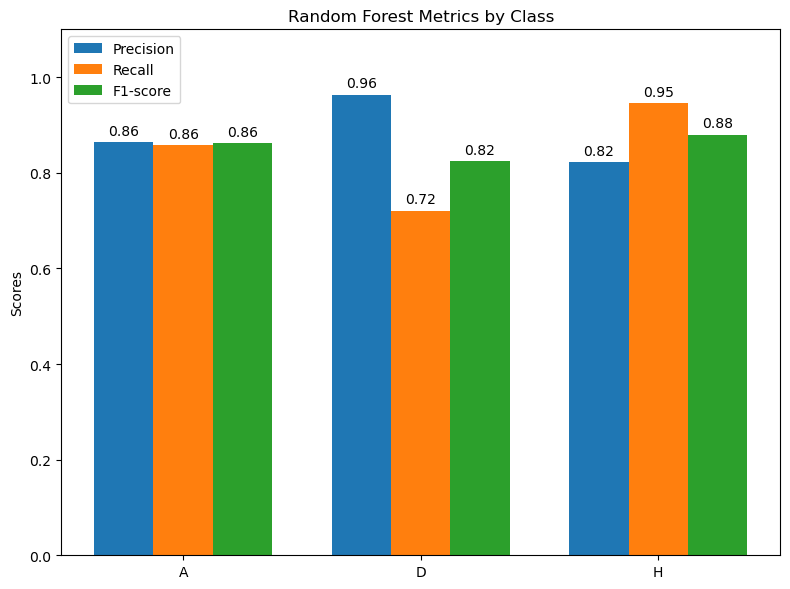

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Get classification report as a dict
report = classification_report(y_test, rf_preds, output_dict=True)

# 2. Extract precision, recall, f1-score for each class
classes = list(report.keys())[:3]  # adjust if you have extra rows like 'accuracy'
precision = [report[c]['precision'] for c in classes]
recall = [report[c]['recall'] for c in classes]
f1_score = [report[c]['f1-score'] for c in classes]

# 3. Visualization
x = np.arange(len(classes))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Random Forest Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.1)
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.tight_layout()
plt.show()


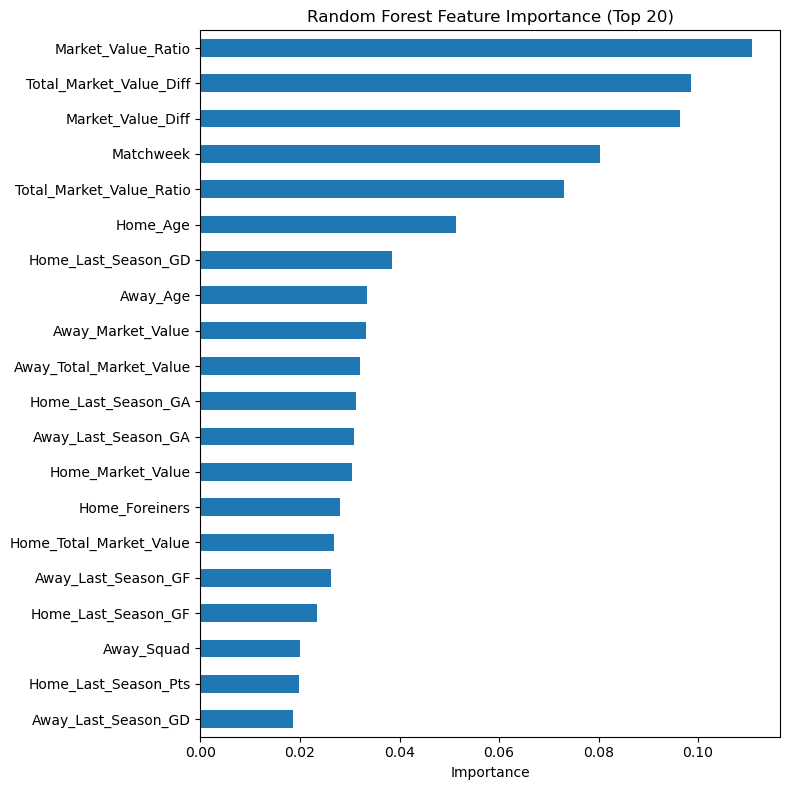

In [69]:
# feature_names should align with X_test columns
feature_names = getattr(X_test, 'columns', [f'f{i}' for i in range(X_test.shape[1])])
imp = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False).head(20)

plt.figure(figsize=(8,8))
imp.iloc[::-1].plot(kind='barh')  # top 20
plt.title('Random Forest Feature Importance (Top 20)')
plt.xlabel('Importance')
plt.tight_layout(); plt.show()


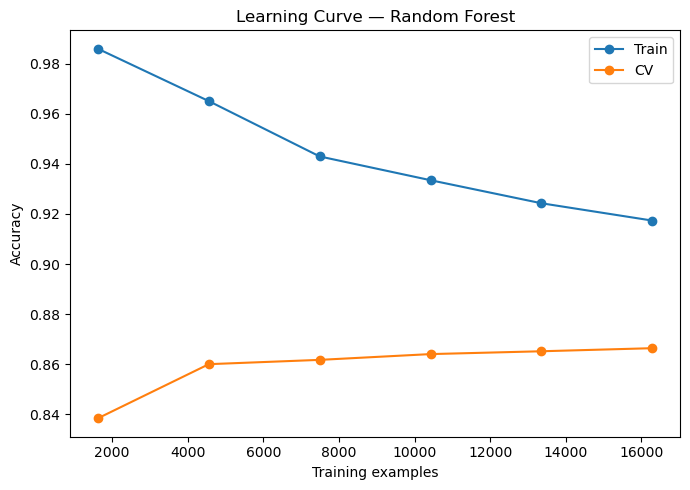

In [70]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 6), n_jobs=-1, shuffle=True, random_state=42
)
train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, marker='o', label='Train')
plt.plot(train_sizes, val_mean, marker='o', label='CV')
plt.xlabel('Training examples'); plt.ylabel('Accuracy')
plt.title('Learning Curve — Random Forest')
plt.legend(); plt.tight_layout(); plt.show()


In [71]:

EPL_25_26.head()

,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90


In [72]:
EPL_25_26['Market_Value_Diff'] = EPL_25_26['Home_Market_Value'] - EPL_25_26['Away_Market_Value']
EPL_25_26['Total_Market_Value_Diff'] = EPL_25_26['Home_Total_Market_Value'] - EPL_25_26['Away_Total_Market_Value']

EPL_25_26['Market_Value_Ratio'] = EPL_25_26['Home_Market_Value'] / EPL_25_26['Away_Market_Value'].replace(0, 0.001)
EPL_25_26['Total_Market_Value_Ratio'] = EPL_25_26['Home_Total_Market_Value'] / EPL_25_26['Away_Total_Market_Value'].replace(0, 0.001)

EPL_25_26.head()

,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35,22.27,644.65,2.483678,2.480763
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90,-5.20,-135.40,0.800231,0.799970
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60,2.54,262.00,1.176144,1.790109
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65,-6.77,-124.67,0.489827,0.664550
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90,20.33,615.20,4.451613,3.747655


In [73]:
EPL_25_26 = EPL_25_26.merge(
    EPL_past_full[['Team', 'Season', 'Last_Season_Pos', 'Last_Season_Pts']].rename(columns = {
        'Team': 'HomeTeam',
        'Last_Season_Pos': 'Home_Last_Season_Pos',
        'Last_Season_Pts': 'Home_Last_Season_Pts'
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

EPL_25_26 = EPL_25_26.merge(
    EPL_past_full[['Team', 'Season', 'Last_Season_Pos', 'Last_Season_Pts']].rename(columns = {
        'Team': 'AwayTeam',
        'Last_Season_Pos': 'Away_Last_Season_Pos',
        'Last_Season_Pts': 'Away_Last_Season_Pts'
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

EPL_25_26.head()

,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35,22.27,644.65,2.483678,2.480763,1,84.0,9,56.0
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90,-5.20,-135.40,0.800231,0.799970,6,66.0,5,66.0
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60,2.54,262.00,1.176144,1.790109,8,61.0,11,54.0
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65,-6.77,-124.67,0.489827,0.664550,20,-1.0,14,43.0
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90,20.33,615.20,4.451613,3.747655,17,38.0,19,-1.0


In [74]:
EPL_25_26 = EPL_25_26.merge(
    EPL_past_full[['Team', 'Season', 'CL', 'EL', 'ECL']].rename(columns = {
        'Team': 'HomeTeam',
        'CL': 'Home_CL',
        'EL': 'Home_EL',
        "ECL": "Home_ECL"
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

EPL_25_26 = EPL_25_26.merge(
    EPL_past_full[['Team', 'Season', 'CL', 'EL', 'ECL']].rename(columns = {
        'Team': 'AwayTeam',
        'CL': 'Away_CL',
        'EL': 'Away_EL',
        "ECL": "Away_ECL"
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

EPL_25_26.head()

,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35,22.27,644.65,2.483678,2.480763,1,84.0,9,56.0,1,0,0,0,0,0
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90,-5.20,-135.40,0.800231,0.799970,6,66.0,5,66.0,0,1,0,1,0,0
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60,2.54,262.00,1.176144,1.790109,8,61.0,11,54.0,0,0,0,0,0,0
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65,-6.77,-124.67,0.489827,0.664550,20,-1.0,14,43.0,0,0,0,0,0,0
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90,20.33,615.20,4.451613,3.747655,17,38.0,19,-1.0,1,0,0,0,0,0


In [75]:
# Add binary flags
EPL_25_26['Home_Is_Promoted'] = EPL_25_26['Home_Last_Season_Pos'].isna().astype(int)
EPL_25_26['Away_Is_Promoted'] = EPL_25_26['Away_Last_Season_Pos'].isna().astype(int)

EPL_25_26

,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35,22.27,644.65,2.483678,2.480763,1,84.0,9,56.0,1,0,0,0,0,0,0,0
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90,-5.20,-135.40,0.800231,0.799970,6,66.0,5,66.0,0,1,0,1,0,0,0,0
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60,2.54,262.00,1.176144,1.790109,8,61.0,11,54.0,0,0,0,0,0,0,0,0
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65,-6.77,-124.67,0.489827,0.664550,20,-1.0,14,43.0,0,0,0,0,0,0,0,0
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90,20.33,615.20,4.451613,3.747655,17,38.0,19,-1.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Man City,Aston Villa,38,25_26,38.21,1380.00,20.83,541.50,17.38,838.50,1.834373,2.548476,3,71.0,6,66.0,1,0,0,0,1,0,0,0
376,Nott'm Forest,Bournemouth,38,25_26,16.51,445.70,15.01,435.35,1.50,10.35,1.099933,1.023774,7,65.0,9,56.0,0,0,1,0,0,0,0,0
377,Sunderland,Chelsea,38,25_26,6.50,246.98,31.91,1180.00,-25.41,-933.02,0.203698,0.209305,20,-1.0,4,69.0,0,0,0,1,0,0,0,0
378,Tottenham,Everton,38,25_26,26.22,839.10,14.19,312.20,12.03,526.90,1.847780,2.687700,17,38.0,13,48.0,1,0,0,0,0,0,0,0


In [76]:
def euro_weight(cl, el, ecl):
    return cl * 3 + el * 2 + ecl * 1

EPL_25_26['Home_Euro_Weight'] = euro_weight(EPL_25_26['Home_CL'], EPL_25_26['Home_EL'], EPL_25_26['Home_ECL'])
EPL_25_26['Away_Euro_Weight'] = euro_weight(EPL_25_26['Away_CL'], EPL_25_26['Away_EL'], EPL_25_26['Away_ECL'])
EPL_25_26['Euro_Weight_Diff'] = EPL_25_26['Home_Euro_Weight'] - EPL_25_26['Away_Euro_Weight']


In [77]:
EPL_25_26 = EPL_25_26.merge(
    EPL_past_full[['Team', 'Season', 'Last_Season_GF', 'Last_Season_GA', 'Last_Season_GD']].rename(columns = {
        'Team': 'HomeTeam',
        'Last_Season_GF': 'Home_Last_Season_GF',
        'Last_Season_GA': 'Home_Last_Season_GA',
        'Last_Season_GD': 'Home_Last_Season_GD'
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

EPL_25_26 = EPL_25_26.merge(
    EPL_past_full[['Team', 'Season', 'Last_Season_GF', 'Last_Season_GA', 'Last_Season_GD']].rename(columns = {
        'Team': 'AwayTeam',
        'Last_Season_GF': 'Away_Last_Season_GF',
        'Last_Season_GA': 'Away_Last_Season_GA',
        'Last_Season_GD': 'Away_Last_Season_GD'
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

EPL_25_26

,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted,Home_Euro_Weight,Away_Euro_Weight,Euro_Weight_Diff,Home_Last_Season_GF,Home_Last_Season_GA,Home_Last_Season_GD,Away_Last_Season_GF,Away_Last_Season_GA,Away_Last_Season_GD
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35,22.27,644.65,2.483678,2.480763,1,84.0,9,56.0,1,0,0,0,0,0,0,0,3,0,3,86.000000,41.000000,45.000000,58.000000,46.000000,12.000000
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90,-5.20,-135.40,0.800231,0.799970,6,66.0,5,66.0,0,1,0,1,0,0,0,0,2,3,-1,58.000000,51.000000,7.000000,68.000000,47.000000,21.000000
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60,2.54,262.00,1.176144,1.790109,8,61.0,11,54.0,0,0,0,0,0,0,0,0,0,0,0,66.000000,59.000000,7.000000,54.000000,54.000000,0.000000
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65,-6.77,-124.67,0.489827,0.664550,20,-1.0,14,43.0,0,0,0,0,0,0,0,0,0,0,0,47.913043,36.347826,11.565217,46.000000,62.000000,-16.000000
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90,20.33,615.20,4.451613,3.747655,17,38.0,19,-1.0,1,0,0,0,0,0,0,0,3,0,3,64.000000,65.000000,-1.000000,57.000000,13.217391,43.782609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Man City,Aston Villa,38,25_26,38.21,1380.00,20.83,541.50,17.38,838.50,1.834373,2.548476,3,71.0,6,66.0,1,0,0,0,1,0,0,0,3,2,1,72.000000,44.000000,28.000000,58.000000,51.000000,7.000000
376,Nott'm Forest,Bournemouth,38,25_26,16.51,445.70,15.01,435.35,1.50,10.35,1.099933,1.023774,7,65.0,9,56.0,0,0,1,0,0,0,0,0,1,0,1,58.000000,46.000000,12.000000,58.000000,46.000000,12.000000
377,Sunderland,Chelsea,38,25_26,6.50,246.98,31.91,1180.00,-25.41,-933.02,0.203698,0.209305,20,-1.0,4,69.0,0,0,0,1,0,0,0,0,0,3,-3,47.913043,36.347826,11.565217,64.000000,43.000000,21.000000
378,Tottenham,Everton,38,25_26,26.22,839.10,14.19,312.20,12.03,526.90,1.847780,2.687700,17,38.0,13,48.0,1,0,0,0,0,0,0,0,3,0,3,64.000000,65.000000,-1.000000,42.000000,44.000000,-2.000000


In [78]:
EPL_25_26 = EPL_25_26.merge(
    EPL_transfer_renamed[['Team', 'Season', 'Squad', 'Age', 'Foreiners']].rename(columns = {
        'Team': 'HomeTeam',
        'Squad': 'Home_Squad',
        'Age': 'Home_Age',
        'Foreiners': 'Home_Foreiners'
    }),
    on = ['HomeTeam', 'Season'],
    how = 'left'
)

EPL_25_26 = EPL_25_26.merge(
    EPL_transfer_renamed[['Team', 'Season', 'Squad', 'Age', 'Foreiners']].rename(columns = {
        'Team': 'AwayTeam',
        'Squad': 'Away_Squad',
        'Age': 'Away_Age',
        'Foreiners': 'Away_Foreiners'
    }),
    on = ['AwayTeam', 'Season'],
    how  = 'left'
)

EPL_25_26

,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted,Home_Euro_Weight,Away_Euro_Weight,Euro_Weight_Diff,Home_Last_Season_GF,Home_Last_Season_GA,Home_Last_Season_GD,Away_Last_Season_GF,Away_Last_Season_GA,Away_Last_Season_GD,Home_Squad,Home_Age,Home_Foreiners,Away_Squad,Away_Age,Away_Foreiners
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35,22.27,644.65,2.483678,2.480763,1,84.0,9,56.0,1,0,0,0,0,0,0,0,3,0,3,86.000000,41.000000,45.000000,58.000000,46.000000,12.000000,29,25.6,23,29,26.0,23
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90,-5.20,-135.40,0.800231,0.799970,6,66.0,5,66.0,0,1,0,1,0,0,0,0,2,3,-1,58.000000,51.000000,7.000000,68.000000,47.000000,21.000000,26,27.6,18,26,27.5,12
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60,2.54,262.00,1.176144,1.790109,8,61.0,11,54.0,0,0,0,0,0,0,0,0,0,0,0,66.000000,59.000000,7.000000,54.000000,54.000000,0.000000,35,25.2,27,23,28.4,19
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65,-6.77,-124.67,0.489827,0.664550,20,-1.0,14,43.0,0,0,0,0,0,0,0,0,0,0,0,47.913043,36.347826,11.565217,46.000000,62.000000,-16.000000,38,24.3,27,28,26.8,18
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90,20.33,615.20,4.451613,3.747655,17,38.0,19,-1.0,1,0,0,0,0,0,0,0,3,0,3,64.000000,65.000000,-1.000000,57.000000,13.217391,43.782609,32,24.6,25,38,26.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Man City,Aston Villa,38,25_26,38.21,1380.00,20.83,541.50,17.38,838.50,1.834373,2.548476,3,71.0,6,66.0,1,0,0,0,1,0,0,0,3,2,1,72.000000,44.000000,28.000000,58.000000,51.000000,7.000000,36,25.8,25,26,27.6,18
376,Nott'm Forest,Bournemouth,38,25_26,16.51,445.70,15.01,435.35,1.50,10.35,1.099933,1.023774,7,65.0,9,56.0,0,0,1,0,0,0,0,0,1,0,1,58.000000,46.000000,12.000000,58.000000,46.000000,12.000000,27,26.5,21,29,26.0,23
377,Sunderland,Chelsea,38,25_26,6.50,246.98,31.91,1180.00,-25.41,-933.02,0.203698,0.209305,20,-1.0,4,69.0,0,0,0,1,0,0,0,0,0,3,-3,47.913043,36.347826,11.565217,64.000000,43.000000,21.000000,38,24.3,27,37,23.6,24
378,Tottenham,Everton,38,25_26,26.22,839.10,14.19,312.20,12.03,526.90,1.847780,2.687700,17,38.0,13,48.0,1,0,0,0,0,0,0,0,3,0,3,64.000000,65.000000,-1.000000,42.000000,44.000000,-2.000000,32,24.6,25,22,26.1,12


In [79]:
# 1. Ensure the columns match the model's training features
X_25_26 = EPL_25_26[X_train.columns]  # same columns, same order

# 2. Predict match results
pred_labels = rf.predict(X_25_26)         # 'A', 'D', 'H'
pred_probs = rf.predict_proba(X_25_26)    # probability for each outcome

# 3. Add predictions to your dataframe
EPL_25_26['Pred_Result'] = pred_labels
EPL_25_26[['Prob_A', 'Prob_D', 'Prob_H']] = pred_probs

EPL_25_26


,HomeTeam,AwayTeam,Matchweek,Season,Home_Market_Value,Home_Total_Market_Value,Away_Market_Value,Away_Total_Market_Value,Market_Value_Diff,Total_Market_Value_Diff,Market_Value_Ratio,Total_Market_Value_Ratio,Home_Last_Season_Pos,Home_Last_Season_Pts,Away_Last_Season_Pos,Away_Last_Season_Pts,Home_CL,Home_EL,Home_ECL,Away_CL,Away_EL,Away_ECL,Home_Is_Promoted,Away_Is_Promoted,Home_Euro_Weight,Away_Euro_Weight,Euro_Weight_Diff,Home_Last_Season_GF,Home_Last_Season_GA,Home_Last_Season_GD,Away_Last_Season_GF,Away_Last_Season_GA,Away_Last_Season_GD,Home_Squad,Home_Age,Home_Foreiners,Away_Squad,Away_Age,Away_Foreiners,Pred_Result,Prob_A,Prob_D,Prob_H
0,Liverpool,Bournemouth,1,25_26,37.28,1080.00,15.01,435.35,22.27,644.65,2.483678,2.480763,1,84.0,9,56.0,1,0,0,0,0,0,0,0,3,0,3,86.000000,41.000000,45.000000,58.000000,46.000000,12.000000,29,25.6,23,29,26.0,23,H,0.086924,0.096378,0.816698
1,Aston Villa,Newcastle,1,25_26,20.83,541.50,26.03,676.90,-5.20,-135.40,0.800231,0.799970,6,66.0,5,66.0,0,1,0,1,0,0,0,0,2,3,-1,58.000000,51.000000,7.000000,68.000000,47.000000,21.000000,26,27.6,18,26,27.5,12,A,0.480283,0.188007,0.331710
2,Brighton,Fulham,1,25_26,16.96,593.60,14.42,331.60,2.54,262.00,1.176144,1.790109,8,61.0,11,54.0,0,0,0,0,0,0,0,0,0,0,0,66.000000,59.000000,7.000000,54.000000,54.000000,0.000000,35,25.2,27,23,28.4,19,H,0.320917,0.268805,0.410278
3,Sunderland,West Ham,1,25_26,6.50,246.98,13.27,371.65,-6.77,-124.67,0.489827,0.664550,20,-1.0,14,43.0,0,0,0,0,0,0,0,0,0,0,0,47.913043,36.347826,11.565217,46.000000,62.000000,-16.000000,38,24.3,27,28,26.8,18,D,0.353944,0.377079,0.268977
4,Tottenham,Burnley,1,25_26,26.22,839.10,5.89,223.90,20.33,615.20,4.451613,3.747655,17,38.0,19,-1.0,1,0,0,0,0,0,0,0,3,0,3,64.000000,65.000000,-1.000000,57.000000,13.217391,43.782609,32,24.6,25,38,26.0,29,H,0.081811,0.109848,0.808341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Man City,Aston Villa,38,25_26,38.21,1380.00,20.83,541.50,17.38,838.50,1.834373,2.548476,3,71.0,6,66.0,1,0,0,0,1,0,0,0,3,2,1,72.000000,44.000000,28.000000,58.000000,51.000000,7.000000,36,25.8,25,26,27.6,18,H,0.128049,0.212030,0.659921
376,Nott'm Forest,Bournemouth,38,25_26,16.51,445.70,15.01,435.35,1.50,10.35,1.099933,1.023774,7,65.0,9,56.0,0,0,1,0,0,0,0,0,1,0,1,58.000000,46.000000,12.000000,58.000000,46.000000,12.000000,27,26.5,21,29,26.0,23,H,0.148471,0.137793,0.713736
377,Sunderland,Chelsea,38,25_26,6.50,246.98,31.91,1180.00,-25.41,-933.02,0.203698,0.209305,20,-1.0,4,69.0,0,0,0,1,0,0,0,0,0,3,-3,47.913043,36.347826,11.565217,64.000000,43.000000,21.000000,38,24.3,27,37,23.6,24,A,0.742163,0.166150,0.091687
378,Tottenham,Everton,38,25_26,26.22,839.10,14.19,312.20,12.03,526.90,1.847780,2.687700,17,38.0,13,48.0,1,0,0,0,0,0,0,0,3,0,3,64.000000,65.000000,-1.000000,42.000000,44.000000,-2.000000,32,24.6,25,22,26.1,12,H,0.312073,0.225650,0.462276


In [80]:
n_sims = 5
teams = sorted(set(EPL_25_26['HomeTeam']) | set(EPL_25_26['AwayTeam']))
points_sum = {team: 0 for team in teams}

for _ in range(n_sims):
    pts = {team: 0 for team in teams}
    for _, row in EPL_25_26.iterrows():
        probs = rf.predict_proba([row[X_train.columns]])[0]
        outcome = np.random.choice(rf.classes_, p=probs)
        if outcome == 'H':
            pts[row['HomeTeam']] += 3
        elif outcome == 'A':
            pts[row['AwayTeam']] += 3
        else:
            pts[row['HomeTeam']] += 1
            pts[row['AwayTeam']] += 1
    for team in teams:
        points_sum[team] += pts[team]

# Average points
avg_points = {team: round(points_sum[team] / n_sims, 1) for team in teams}
table = pd.DataFrame({'Team': avg_points.keys(), 'Avg_Points': avg_points.values()})
table = table.sort_values('Avg_Points', ascending=False).reset_index(drop=True)
print(table)


c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:4

              Team  Avg_Points
0          Arsenal        83.4
1        Liverpool        78.4
2         Man City        71.2
3          Chelsea        69.0
4        Newcastle        64.8
5        Tottenham        59.0
6       Man United        56.6
7      Aston Villa        53.0
8    Nott'm Forest        52.0
9          Everton        51.8
10        Brighton        50.6
11  Crystal Palace        50.6
12          Fulham        49.6
13     Bournemouth        47.0
14          Wolves        43.0
15       Brentford        40.6
16        West Ham        40.4
17           Leeds        36.8
18      Sunderland        30.0
19         Burnley        29.2


c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:4

In [81]:
# --- 0) Prep
rng = np.random.default_rng(42)           # reproducible randomness
X_cols = list(X_train.columns)            # exact feature order used in training
fixtures = EPL_25_26.copy()

# Ensure the fixtures have every feature column (fill any missing with 0 or a sensible value)
for c in X_cols:
    if c not in fixtures.columns:
        fixtures[c] = 0

X_fix = fixtures.loc[:, X_cols].to_numpy()

# --- 1) Per-match win/draw/away probabilities
proba = rf.predict_proba(X_fix)           # shape: (n_matches, n_classes)
cls = list(rf.classes_)                   # e.g., ['A','D','H'] or any order
# Build columns p_H, p_D, p_A regardless of the class order inside the model
pA = proba[:, cls.index('A')] if 'A' in cls else np.zeros(len(proba))
pD = proba[:, cls.index('D')] if 'D' in cls else np.zeros(len(proba))
pH = proba[:, cls.index('H')] if 'H' in cls else np.zeros(len(proba))

match_probs = fixtures[['HomeTeam','AwayTeam','Matchweek','Season']].copy()
match_probs['PH'] = pH
match_probs['PD'] = pD
match_probs['PA'] = pA
match_probs['Pred'] = np.array(['H','D','A'])[np.argmax(np.stack([pH,pD,pA], axis=1), axis=1)]

# --- 2) Monte Carlo simulate the season
teams = sorted(set(fixtures['HomeTeam']) | set(fixtures['AwayTeam']))
team_idx = {t:i for i,t in enumerate(teams)}
n_teams = len(teams)

n_sims = 5  # bump this up when it’s fast enough for your machine
points_sum = np.zeros(n_teams, dtype=float)
title_hits = np.zeros(n_teams, dtype=int)
top4_hits = np.zeros(n_teams, dtype=int)
releg_hits = np.zeros(n_teams, dtype=int)

# Turn class-prob rows into arrays of [p_H, p_D, p_A] for quick sampling
pdists = np.stack([pH, pD, pA], axis=1)
labels = np.array(['H','D','A'])

home = fixtures['HomeTeam'].to_numpy()
away = fixtures['AwayTeam'].to_numpy()

for _ in range(n_sims):
    # Draw one outcome for each match according to its probability vector
    # We draw by cumulative-threshold method for speed
    u = rng.random(len(pdists))
    cum = pdists.cumsum(axis=1)
    outcome_idx = (u[:,None] > cum).sum(axis=1)   # 0=H,1=D,2=A
    outcome = labels[outcome_idx]

    pts = np.zeros(n_teams, dtype=int)

    # Award points (vectorized-ish)
    home_wins = np.where(outcome=='H')[0]
    draws     = np.where(outcome=='D')[0]
    away_wins = np.where(outcome=='A')[0]

    # Home wins: +3 to home teams
    for i in home_wins:
        pts[team_idx[home[i]]] += 3
    # Away wins: +3 to away teams
    for i in away_wins:
        pts[team_idx[away[i]]] += 3
    # Draws: +1 each
    for i in draws:
        pts[team_idx[home[i]]] += 1
        pts[team_idx[away[i]]] += 1

    points_sum += pts

    # Standings for this sim (tie-break is pure points; add GD later if you model it)
    order = np.argsort(-pts)  # descending
    # title / top-4 / relegation hits
    title_hits[order[0]] += 1
    top4_hits[order[:4]] += 1
    releg_hits[order[-3:]] += 1

# --- 3) Aggregate results
avg_points = points_sum / n_sims
table = pd.DataFrame({
    'Team': teams,
    'Points': np.round(avg_points, 1),
    'Title': np.round(100 * title_hits / n_sims, 1),
    'Top4': np.round(100 * top4_hits / n_sims, 1),
    'Relegation': np.round(100 * releg_hits / n_sims, 1),
}).sort_values(['Points','Title'], ascending=[False, False]).reset_index(drop=True)

match_probs

c:\Users\liver\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,HomeTeam,AwayTeam,Matchweek,Season,PH,PD,PA,Pred
0,Liverpool,Bournemouth,1,25_26,0.816698,0.096378,0.086924,H
1,Aston Villa,Newcastle,1,25_26,0.331710,0.188007,0.480283,A
2,Brighton,Fulham,1,25_26,0.410278,0.268805,0.320917,H
3,Sunderland,West Ham,1,25_26,0.268977,0.377079,0.353944,D
4,Tottenham,Burnley,1,25_26,0.808341,0.109848,0.081811,H
...,...,...,...,...,...,...,...,...
375,Man City,Aston Villa,38,25_26,0.659921,0.212030,0.128049,H
376,Nott'm Forest,Bournemouth,38,25_26,0.713736,0.137793,0.148471,H
377,Sunderland,Chelsea,38,25_26,0.091687,0.166150,0.742163,A
378,Tottenham,Everton,38,25_26,0.462276,0.225650,0.312073,H


In [82]:
table

,Team,Points,Title,Top4,Relegation
0,Man City,77.2,40.0,100.0,0.0
1,Arsenal,76.8,40.0,100.0,0.0
2,Liverpool,71.0,0.0,60.0,0.0
3,Chelsea,65.2,0.0,40.0,0.0
4,Man United,63.8,0.0,80.0,0.0
5,Tottenham,61.4,20.0,20.0,0.0
6,Newcastle,58.4,0.0,0.0,0.0
7,Nott'm Forest,55.2,0.0,0.0,0.0
8,Aston Villa,52.8,0.0,0.0,0.0
9,Brighton,52.2,0.0,0.0,0.0


In [83]:
# Save season simulation results
table.to_csv("EPL_simulated_table.csv", index=False)

# Save per-match predictions
match_probs.to_csv("EPL_match_predictions.csv", index=False)


In [84]:
EPL_25_26.to_csv("EPL_25_26_full_df.csv", index = False)

In [86]:
EPL_past_full_top_1 = EPL_past_full[EPL_past_full['Last_Season_Pos'] == 1]

In [87]:
EPL_past_full_top_1.to_csv("EPL_past_full_top_1.csv", index = False)

In [95]:
EPL_past_CL_EL = EPL_past_full[(EPL_past_full['CL'] == 1) | (EPL_past_full['EL'] == 1)]

In [96]:
EPL_past_CL_EL.to_csv("EPL_past_CL_EL.csv", index = False)

In [92]:
EPL_past_EL = EPL_past_full[EPL_past_full['EL'] == 1]

In [93]:
EPL_past_EL.to_csv("EPL_past_EL.csv", index = False)